In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import kagglehub

import shutil  



In [16]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")

In [17]:
data_dir = "data"
csv_file = "kidney_data.csv"
csv_path = os.path.join(data_dir, csv_file)

# Check if file exists, if not, download it
if not os.path.exists(csv_path):
    print(f"File not found at {csv_path}. Downloading from Kaggle...")
    
    # 1. Download
    download_path = kagglehub.dataset_download("miadul/kidney-function-health-dataset")
    print(f"Downloaded to cache: {download_path}")
    
    # 2. Create local data folder
    os.makedirs(data_dir, exist_ok=True)
    
    # 3. Find the CSV in the download path and move it
    found_files = [f for f in os.listdir(download_path) if f.endswith('.csv')]
    if found_files:
        source = os.path.join(download_path, found_files[0])
        shutil.copy(source, csv_path)
        print(f"Success! Moved dataset to: {csv_path}")
    else:
        raise FileNotFoundError("No CSV file found in the downloaded Kaggle dataset.")
else:
    print(f"Dataset found locally at: {csv_path}")

# 4. Load the DataFrame
df = pd.read_csv(csv_path)

# Initial Glimpse
print(f"Dataset Shape: {df.shape}")
df.head()

File not found at data/kidney_data.csv. Downloading from Kaggle...
Downloaded to cache: /Users/chandanchugh/.cache/kagglehub/datasets/miadul/kidney-function-health-dataset/versions/1
Success! Moved dataset to: data/kidney_data.csv
Dataset Shape: (5000, 11)


,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


In [19]:
# 4. Duplicate Removal
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"\nRemoved {duplicates} duplicate rows.")

In [20]:
# Identifying missing values
missing = df.isna().sum()
print(f"\n--- Missing Values ---\n{missing[missing > 0]}")


--- Missing Values ---
Medication    2987
dtype: int64


In [22]:

categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:", df.isna().sum().sum())


Missing values after cleaning: 0


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Creatinine,5000.0,1.994088,2.027013,0.600040,0.801333,1.007629,2.163997,7.996428
BUN,5000.0,30.780063,31.148341,7.007732,11.367599,15.878566,40.636666,119.931652
GFR,5000.0,73.251883,31.972399,5.000000,53.036801,89.555882,93.989273,105.451432
Urine_Output,5000.0,1664.302800,599.384655,400.502554,1105.890821,1814.499690,2146.441778,2499.939696
Diabetes,5000.0,0.294000,0.455637,0.000000,0.000000,0.000000,1.000000,1.000000
Hypertension,5000.0,0.378200,0.484986,0.000000,0.000000,0.000000,1.000000,1.000000
Age,5000.0,50.048733,14.492020,18.000000,40.190016,49.942824,59.761132,90.000000
Protein_in_Urine,5000.0,537.053851,817.510451,50.010471,83.692533,119.492591,588.428649,2997.724192
Water_Intake,5000.0,2.504335,0.868925,1.000810,1.744138,2.511710,3.268812,3.998043
CKD_Status,5000.0,0.263000,0.440306,0.000000,0.000000,0.000000,1.000000,1.000000


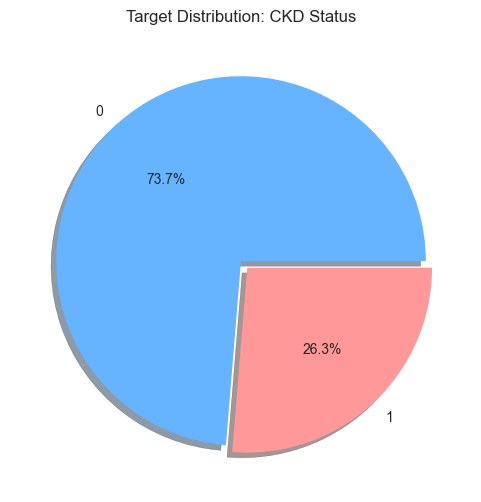

In [24]:
plt.figure(figsize=(6, 6))
df["CKD_Status"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    colors=["#66b3ff", "#ff9999"],
    explode=(0, 0.05), 
    shadow=True
)
plt.title("Target Distribution: CKD Status")
plt.ylabel("")
plt.show()

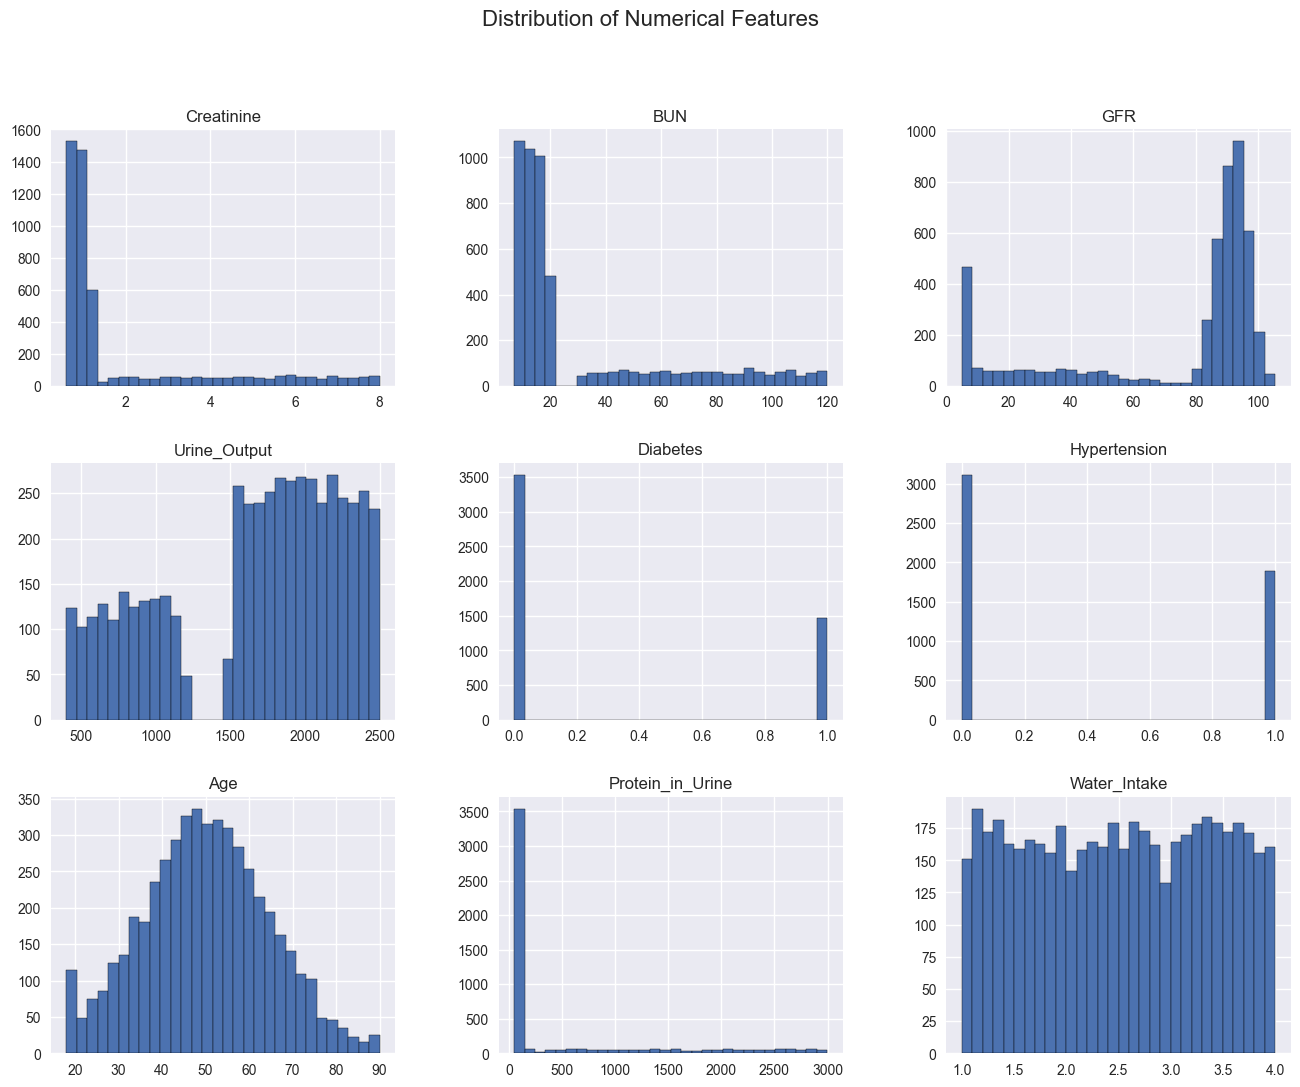

In [25]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop("CKD_Status", errors='ignore')

df[num_cols].hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

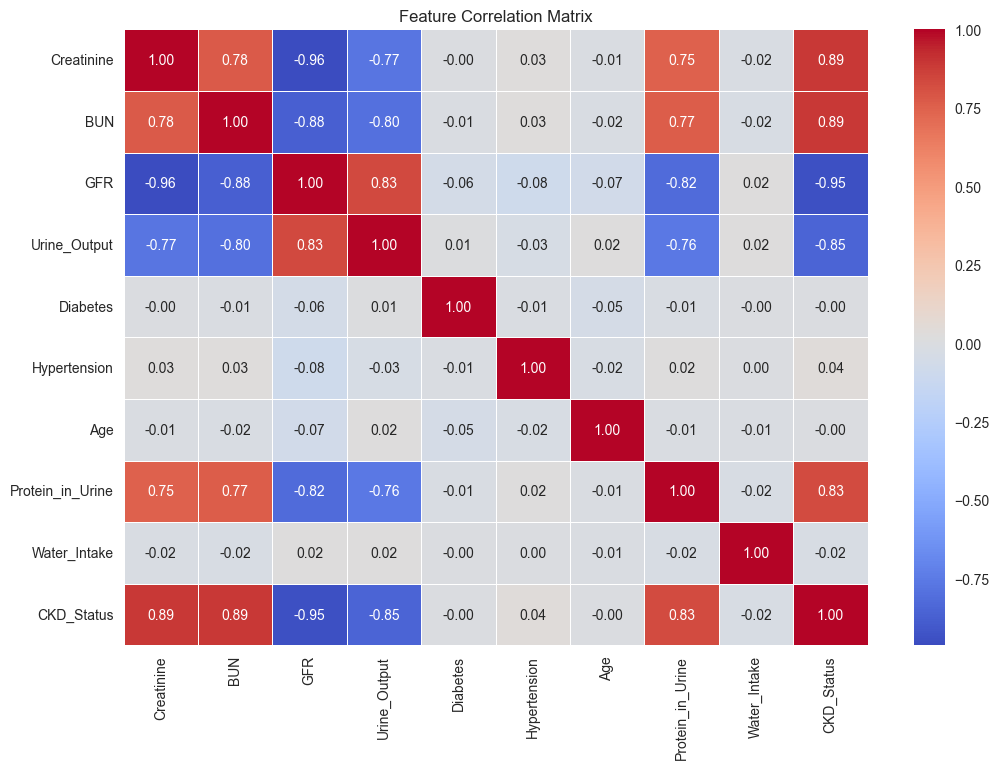

In [26]:
# 9. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Calculate correlation only on numeric columns
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

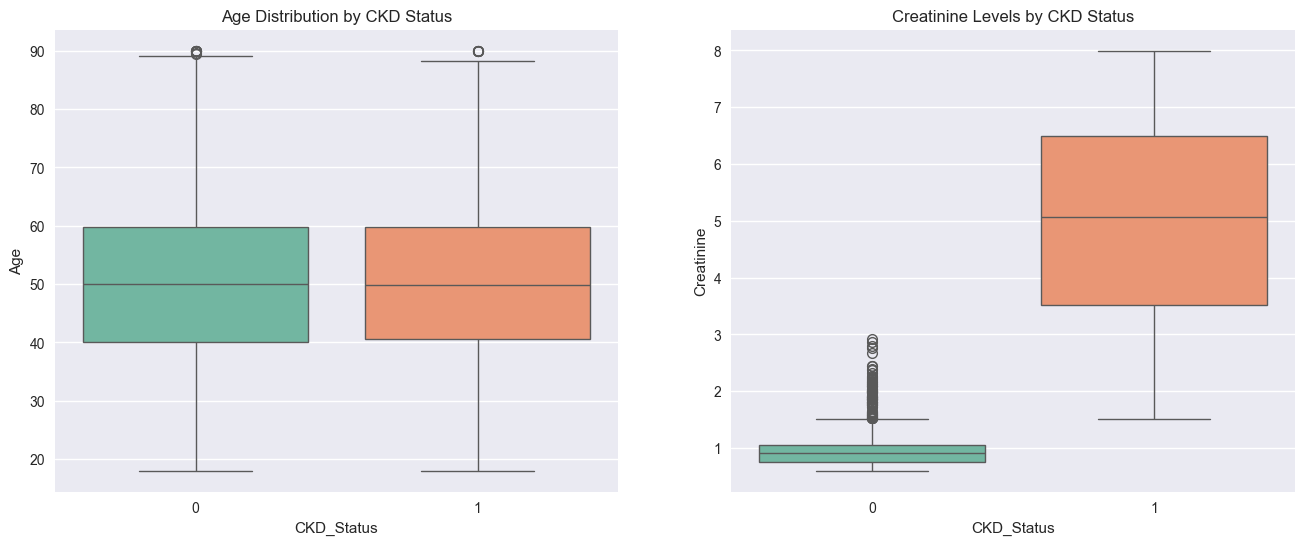

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot: Age vs CKD Status
sns.boxplot(data=df, x="CKD_Status", y="Age", palette="Set2", ax=axes[0])
axes[0].set_title("Age Distribution by CKD Status")

# Boxplot: Creatinine vs CKD Status
sns.boxplot(data=df, x="CKD_Status", y="Creatinine", palette="Set2", ax=axes[1])
axes[1].set_title("Creatinine Levels by CKD Status")

plt.show()

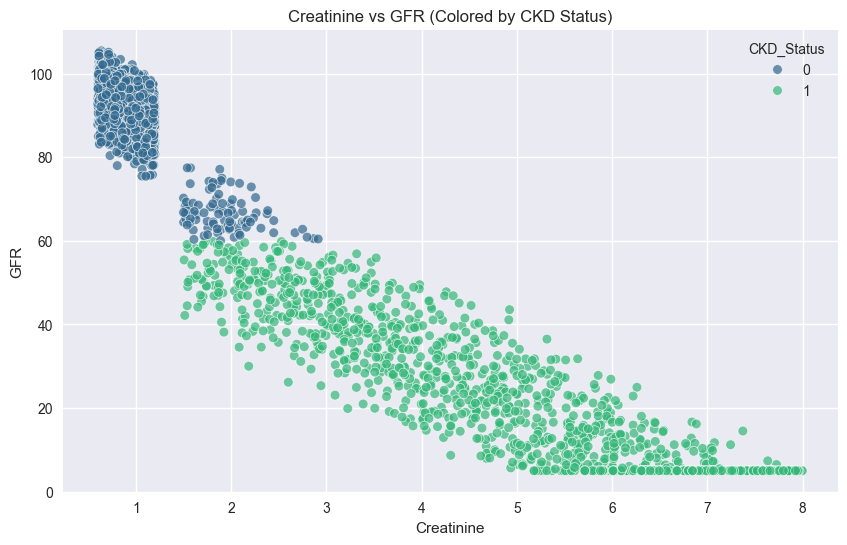

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Creatinine", y="GFR", hue="CKD_Status", alpha=0.7, palette="viridis")
plt.title("Creatinine vs GFR (Colored by CKD Status)")
plt.show()